In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

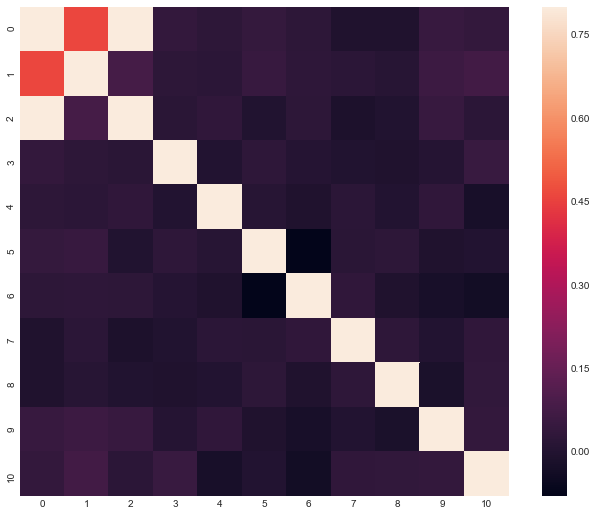

In [2]:
#number of datapoints in outcome
n = 1000

#number of features
p = 10

#create random normally distributed data for parameters
X = np.random.normal(size=n * p).reshape((n,p))

#create normally distributed outcome related to parameters but with noise
y = X[:,0] + 2 * X[:,1] + np.random.normal(size=n * 1) + 5

#check out correlations, first column is the outcome
f, ax = plt.subplots(figsize=(12,9))
corrmat = pd.DataFrame(np.insert(X,0,y,axis=1)).corr()

#plot heatmap
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

R-squared regression: 0.844136101079614
R-squared PLSR: 0.8441356720988029


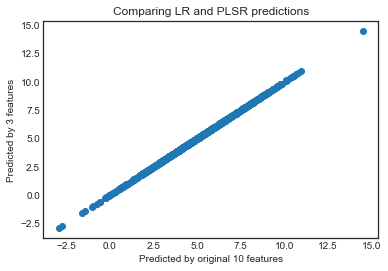

In [6]:
#fit a linear model with all 10 features
regr = linear_model.LinearRegression()
regr.fit(X,y)

#save predicted values
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X,y))

#fit a linear model using Partial Lease Squares Regression
#reduce feature space to 3 dimensions
pls1 = PLSRegression(n_components=3)

#reduce X and R(X) and regress on y
pls1.fit(X,y)

#save predicted values
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X,y))

#compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.844136101079614
R-squared PLSR2: 0.844136101076556


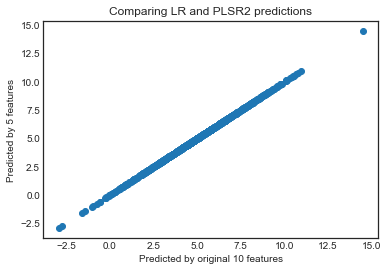

In [7]:
print('R-squared regression:', regr.score(X,y))

pls2 = PLSRegression(n_components=5)
pls2.fit(X,y)
Y_PLS2_pred = pls2.predict(X)
print('R-squared PLSR2:', pls2.score(X,y))

plt.scatter(Y_pred,Y_PLS2_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR2 predictions')
plt.show()

R-squared regression: 0.844136101079614
R-squared PLSR3: 0.8345612028782023


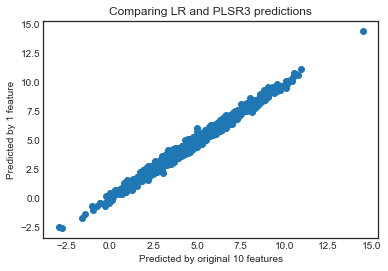

In [8]:
print('R-squared regression:', regr.score(X,y))

pls3 = PLSRegression(n_components=1)
pls3.fit(X,y)
Y_PLS3_pred = pls3.predict(X)
print('R-squared PLSR3:', pls3.score(X,y))

plt.scatter(Y_pred,Y_PLS3_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 1 feature')
plt.title('Comparing LR and PLSR3 predictions')
plt.show()